<a href="https://colab.research.google.com/github/avishekanand/NRLPapers/blob/master/image_text_retrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Performing Semantic Search on Fashion Product Images

This code demonstrates how to perform semantic search on a dataset of fashion product images using the `sentence-transformers` library.

**1. Installation:**

The code starts by installing the `datasets` and `sentence-transformers` libraries using pip.

In [ ]:
!pip install datasets
!pip install sentence-transformers==2.2.2

from datasets import load_dataset
from sentence_transformers import SentenceTransformer, util

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.1 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 7.2

**2. Load Dataset:** The following loads a dataset of fashion product images using the `load_dataset` function from the datasets library. This dataset is from amazon with over 44,000 products making it a nice playground to play with.

In [ ]:
fashion = load_dataset(
    "ashraq/fashion-product-images-small",
    split="train"
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/867 [00:00<?, ?B/s]

(…)-00000-of-00002-6cff4c59f91661c3.parquet:   0%|          | 0.00/136M [00:00<?, ?B/s]

(…)-00001-of-00002-bb459e5ac5f01e71.parquet:   0%|          | 0.00/135M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/44072 [00:00<?, ? examples/s]

This data is structured data. Infact it has the following features. Example code to show the schema and some examples.

In [ ]:
fashion.features

{'id': Value(dtype='int64', id=None),
 'gender': Value(dtype='string', id=None),
 'masterCategory': Value(dtype='string', id=None),
 'subCategory': Value(dtype='string', id=None),
 'articleType': Value(dtype='string', id=None),
 'baseColour': Value(dtype='string', id=None),
 'season': Value(dtype='string', id=None),
 'year': Value(dtype='float64', id=None),
 'usage': Value(dtype='string', id=None),
 'productDisplayName': Value(dtype='string', id=None),
 'image': Image(mode=None, decode=True, id=None)}

In [ ]:
fashion.to_pandas().head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...


In [ ]:
images = fashion["image"]
fashion=fashion.remove_columns("image")

fashion_frame=fashion.to_pandas()

**5. Initialize Model:**  It initializes a SentenceTransformer model called `clip-ViT-B-32`, which is a pre-trained model for image and text embeddings.

In [ ]:
model = SentenceTransformer('clip-ViT-B-32')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'cached_download' (from 'huggingface_hub.file_download') is deprecated and will be removed from version '0.26'. Use `hf_hub_download` instead.
  warnings.warn(warning_message, FutureWarning)


.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

0_CLIPModel/config.json:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

0_CLIPModel/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

0_CLIPModel/preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

0_CLIPModel/special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

0_CLIPModel/tokenizer_config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

0_CLIPModel/vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.91k [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


**4. Generating embeddings:** here we generates embeddings the images using the SentenceTransformer model. Note that this loops through all the products in the dataset and is the most time (and resource) intensive part. Once the embeddings have been computed, it is recommended to download them or keep them persistent so that it can be used multiple times.

Note: You can swap out different models here and experiment.

In [ ]:

image_embeddings = model.encode([image for image in images])
# large_image_embeddings = large_model.encode([image for image in images])

**Query Processing** : Now you can process queries by encoding the query using the same multi-lingual model that was used to encode the images.

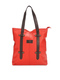

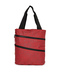

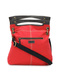

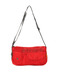

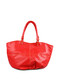

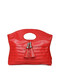

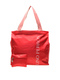

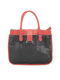

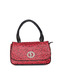

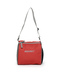

In [ ]:
query="red bag with black straps"
query_embedding = model.encode(query)


results = util.semantic_search(query_embedding, image_embeddings, top_k=10)[0]

for r in results:
    display(images[r['corpus_id']])

Code to download the embeddings from colab

In [ ]:
import numpy as np
from google.colab import files

# Assuming `image_embeddings` contains the embeddings generated above
np.save('image_embeddings.npy', image_embeddings)  # Save the embeddings as a .npy file

# Assuming `image_embeddings` contains the embeddings generated above
np.save('large_image_embeddings.npy', large_image_embeddings)  # Save the embeddings as a .npy file


files.download('image_embeddings.npy')  # This will trigger a download in your browser


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('large_image_embeddings.npy')  # This will trigger a download in your browser

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>